In [1]:
#importing required libraries
import pandas as pd
import seaborn as sns
import re
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.probability import FreqDist

In [2]:
# loading dataset
data=pd.read_csv('C:/Users/Ayush/Downloads/data_science_jobs_india/data_science_jobs_india.csv')

In [3]:
# Glimpse of first few rows of dataset
data.head()

,Job_Role,Company,Location,Job Experience,Skills/Description
0,Senior Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",3-6,"python, MLT, statistical modeling, machine lea..."
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,..."
2,Applied Data Scientist / ML Senior Engineer (P...,SAP India Pvt.Ltd,Bangalore/Bengaluru,5-10,"Python, IT Skills, Testing, Cloud, Product Man..."
3,Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",1-4,"python, machine learning, Data Science, data a..."
4,Data Scientist,Walmart,Bangalore/Bengaluru,4-8,"IT Skills, Python, Data Science, Machine Learn..."


In [4]:
#finding numbers of null values in dataset
data.isnull().sum()

Job_Role              0
Company               0
Location              0
Job Experience        0
Skills/Description    0
dtype: int64

In [5]:
# Great... No null or missing values found

In [6]:
#finding no. of rows and columns in our dateset
data.shape

(12000, 5)

In [7]:
#Top 5 Jobs
top_jobs=data['Job_Role'].value_counts()[:5].rename_axis('Job Role').reset_index(name='Count')
top_jobs.style.background_gradient(cmap='Greens')

,Job Role,Count
0,Data Engineer,580
1,Data Scientist,505
2,Data Analyst,353
3,Senior Technical Lead (Data Engineer),276
4,Senior Data Engineer,197


In [53]:
# plot
dataframe = pd.DataFrame()

for job in top_jobs['Job Role']:
    df1 = data[data['Job_Role']==job]
    skill = [skill.lower() for skills in df1['Skills/Description'] for skill in skills.split(', ') if skill != 'IT Skills']
    fdist = FreqDist(skill)
    fdist_df=pd.DataFrame(list(dict(fdist).items()), columns=['skill', 'count'])
    fdist_df= fdist_df.sort_values(by='count', ascending=False)[:10]
    fdist_df = fdist_df.assign(job=job)
    dataframe=dataframe.append(fdist_df)
#Creating sunburst chart
fig1 = px.sunburst(dataframe,
                  path=['job', 'skill'],
                  values='count'
                 )

fig1.update_layout(
    autosize=False,
    title_text='Top Jobs and the Required Skills',
    title_x=0.5,
    width=1080,
    height=720)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\3621108639.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\3621108639.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\3621108639.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\3621108639.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\3621108639.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [54]:
# Display the figure
fig1.show()

In [9]:
def preprocess_location(loc):
    loc=re.split('\(', loc)[0].strip()
    loc=re.sub('New Delhi','Delhi',loc)
    return loc

In [22]:
# splitting values and saving into a list
loc=data['Location'].tolist()
loc=[j.strip() for i in [j.strip() for i in loc for j in i.split(',')] for j in i.split('/')]

# count
fdist = FreqDist(loc)
loc_df=pd.DataFrame(list(dict(fdist).items()), columns=['location', 'job openings'])

# removing alternate names
for loc in ['Bengaluru','Secunderabad','Cochin','NCR','Gurugram']:
    loc_df=loc_df[loc_df['location']!=loc]
    
# applying function
loc_df['location']=loc_df['location'].apply(preprocess_location)
loc_df=loc_df.groupby('location').sum().reset_index(level=0)
loc_df=loc_df.sort_values(by='job openings',ascending=False)[:10]
loc_df.style.background_gradient(cmap='inferno')

,location,job openings
17,Bangalore,4753
139,Pune,2047
73,Hyderabad,1960
116,Mumbai,1462
39,Chennai,1301
64,Gurgaon,1255
47,Delhi,782
128,Noida,545
98,Kolkata,291
2,Ahmedabad,222


(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

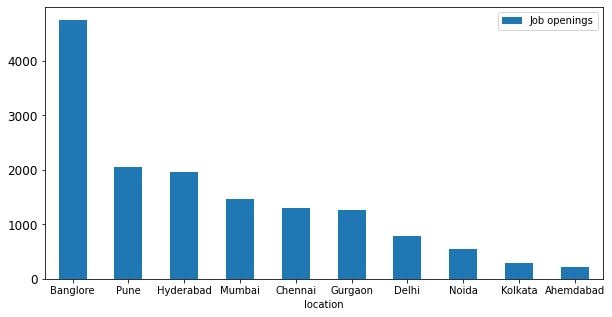

In [23]:
bar_graph = pd.DataFrame({'location':['Banglore', 'Pune', 'Hyderabad','Mumbai','Chennai','Gurgaon','Delhi','Noida','Kolkata','Ahemdabad'], 'Job openings':[4753, 2047, 1960,1462,1301,1255,782,545,291,222]})
ax = bar_graph.plot.bar(x='location', y='Job openings', rot=0)
plt.gcf().set_size_inches(10, 5)
plt.yticks(
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

In [12]:
# Top 10 demanding skills in data science jobs
skills=[j.lower() for i in data['Skills/Description'] for j in i.split(', ')]
fdist = FreqDist(skills)
skill_df=pd.DataFrame(fdist.items(), 
                      columns=['Skill', 'Frequency']
                    ).sort_values('Frequency', ascending=False)[:10]
skill_df.style.background_gradient(cmap='twilight_shifted')

,Skill,Frequency
0,python,3152
4,it skills,2907
3,machine learning,1780
20,data analysis,1614
47,sql,1525
22,big data,1396
23,computer science,1339
87,analytical,1306
8,data science,1288
15,cloud,1242


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

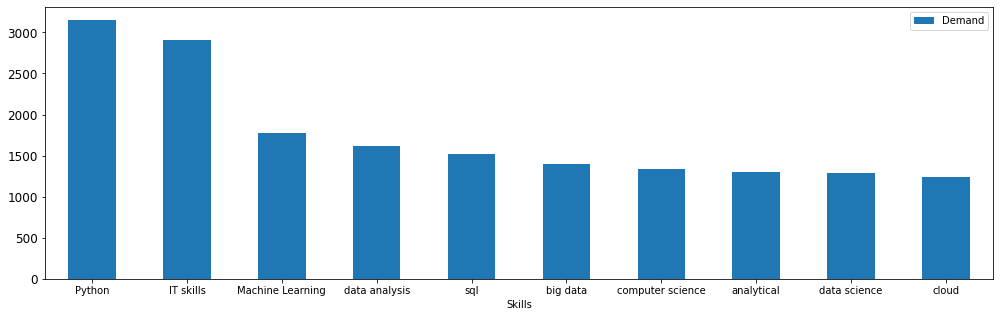

In [13]:
bar_graph = pd.DataFrame({'Skills':['Python', 'IT skills', 'Machine Learning','data analysis','sql','big data','computer science','analytical','data science','cloud'], 'Demand':[3152, 2907, 1780,1614,1525,1396,1339,1306,1288,1242]})
ax = bar_graph.plot.bar(x='Skills', y='Demand', rot=0)
plt.gcf().set_size_inches(17,5)
plt.yticks(
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)

In [14]:
# Number of companies
print('There are total', data['Company'].nunique(),'companies')

There are total 3507 companies


In [15]:
# top 10 companies
df_company=data['Company'].value_counts()[:7].rename_axis('Company').reset_index(name='Job Openings')
df_company.style.background_gradient(cmap='copper')

,Company,Job Openings
0,Accenture,490
1,IBM,316
2,Infostretch solutions Pvt. Ltd.,304
3,Huquo Consulting Pvt. Ltd,295
4,Anicalls,115
5,BNY Mellon,103
6,Microsoft,92


In [49]:
# Companies and Jobs

dataframe = pd.DataFrame()

for company in df_company['Company']:
    df1 = data[data['Company']==company]
    jobs = [job for job in df1['Job_Role']]
    fdist = FreqDist(jobs)
    fdist_df=pd.DataFrame(list(dict(fdist).items()), columns=['jobs', 'count'])
    fdist_df= fdist_df.sort_values(by='count', ascending=False)[:5]
    fdist_df = fdist_df.assign(company=company)
    dataframe=dataframe.append(fdist_df)
    
dataframe.head()
    
# Creating sunburst chart
fig = px.sunburst(dataframe,
                  path=['company', 'jobs'])

fig.update_layout(
    autosize=False,
    title_text='Top Job Providers and Jobs',
    title_x=0.5,
    width=1200,
    height=920)



C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\1184236802.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\1184236802.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\1184236802.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\1184236802.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\Ayush\AppData\Local\Temp\ipykernel_8856\1184236802.py:12: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [51]:
# Display the figure
fig.show()

In [17]:
# top 10 values in 'Job Experience'
data['Job Experience'].value_counts()[:10]

5-10    944
2-5     833
3-8     690
3-5     589
4-9     582
2-7     537
3-6     504
5-8     495
3-7     454
4-8     445
Name: Job Experience, dtype: int64

In [38]:
# outliers in 'Job Experience' column
lst=[]
for i in df['Job Experience']:
    c=False
    for j in i:
        if j.isalpha():
            c=True
    if c==True:
        lst.append(i)
        
lst

['12 May - 21 May',
 'B.Tech/B.E.',
 '16 May - 22 May',
 '12 May - 21 May',
 '17 May - 26 May']

In [39]:
# For removing outliers
for j in lst:
    df=df[df['Job Experience'] != j]

In [40]:
def MinExp(txt):
    num = int(txt.split('-')[0])
    return num

def MaxExp(txt):
    num = int(txt.split('-')[1])
    return num

In [41]:
# new features
df['Min. Exp.'] = df['Job Experience'].apply(MinExp)
df['Max. Exp.'] = df['Job Experience'].apply(MaxExp)

In [42]:
# Average Minimum Job Experience Required For Top Jobs
job_list = df['Job_Role'].value_counts().iloc[:10].index.tolist()  
exp = [round(df[df['Job_Role']==job]['Min. Exp.'].mean(),2) for job in job_list]

df_job=pd.DataFrame({'Jobs':job_list, 'Average Min. Exp':exp})
df_job=df_job.sort_values('Average Min. Exp', ascending=False)
df_job

,Jobs,Average Min. Exp
3,Senior Technical Lead (Data Engineer),4.99
5,Senior Data Engineer,4.65
6,Senior Data Scientist,4.65
7,Azure Data Engineer,4.12
8,Data Engineer: Data Integration,3.97
9,Big Data Engineer,3.62
0,Data Engineer,3.53
1,Data Scientist,3.43
4,Business Analyst,2.64
2,Data Analyst,2.55


In [50]:
# Average Maximum Job Experience Required For Top Jobs
job_list = df['Job_Role'].value_counts().iloc[:10].index.tolist()  
exp = [round(df[df['Job_Role']==job]['Max. Exp.'].mean(),2) for job in job_list]

df_job=pd.DataFrame({'Jobs':job_list, 'Average Max. Exp':exp})
df_job=df_job.sort_values('Average Max. Exp', ascending=False)
df_job

,Jobs,Average Max. Exp
3,Senior Technical Lead (Data Engineer),8.92
6,Senior Data Scientist,8.54
5,Senior Data Engineer,8.49
7,Azure Data Engineer,8.28
9,Big Data Engineer,7.55
0,Data Engineer,7.20
1,Data Scientist,7.19
8,Data Engineer: Data Integration,6.96
4,Business Analyst,5.79
2,Data Analyst,5.64
